<a href="https://colab.research.google.com/github/Aleena24/AML_lab/blob/main/2348503_prg5_lassoReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import scale
import numpy as np
from sklearn.model_selection import cross_val_score

In [48]:
df = pd.read_csv('/content/program_5_dataset.csv')
df.head()

,Pno,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [49]:
df = df.dropna()

In [50]:
x = df['CREA'].values.reshape(-1, 1)
y = df['PROT'].values.reshape(-1, 1)

Simple Linear regression

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [52]:
cdrop = ['Pno','Category','Age','Sex']
x = df.drop(columns = cdrop)

y = df['PROT']

In [53]:
vif = pd.Series([variance_inflation_factor(x.values,idx)
                for idx in range(x.shape[1])],
                index = x.columns)

print(vif)

ALB      89.166626
ALP      10.736817
ALT       3.216524
AST       3.310986
BIL       1.722888
CHE      22.742672
CHOL     31.140640
CREA      3.692195
GGT       2.588358
PROT    129.812863
dtype: float64


In [68]:
variables_not_included = ['Pno', 'Category', 'Age', 'Sex']
X_for_vif = df.drop(columns=['PROT'] + variables_not_included)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_for_vif.values, i) for i in range(X_for_vif.shape[1])]

selected_features = vif_data[vif_data['VIF'] < 5]['Feature'].tolist()

In [55]:
x = x.drop(columns = ['ALT', 'AST', 'BIL', 'CREA', 'GGT'])

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

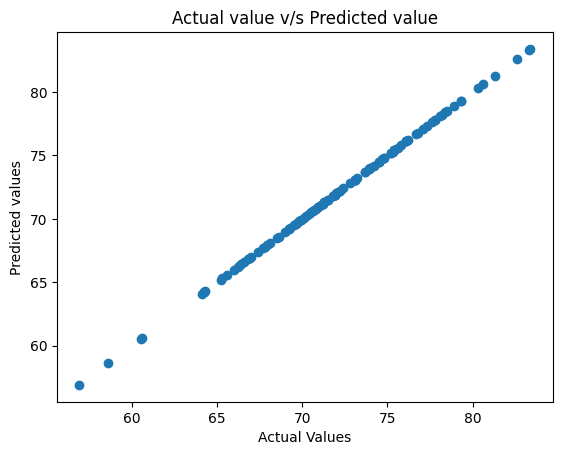

In [57]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Actual value v/s Predicted value')
plt.show()

In [58]:
selected_features = vif_data[vif_data['VIF'] < 5]['Feature'].tolist()

In [59]:
HVF = vif_data.loc[vif_data['VIF'].idxmax()]['Feature']
degree = 3
poly_features = PolynomialFeatures(degree = degree)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

In [60]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [61]:
y_pred = model.predict(x_test_poly)

Ridge

In [62]:
alphas = [0.1, 1, 10, 50, 100, 150]
for alpha in alphas:
  model_ridge = Ridge(alpha=alpha)
  model_ridge.fit(x_train[[HVF]], y_train)

Lasso

In [63]:
alphas_lasso = [0.1, 1, 10, 50, 100]
for alpha_lasso in alphas_lasso:
    model_lasso = Lasso(alpha=alpha_lasso)
    model_lasso.fit(x_train[[HVF]], y_train)

N-Fold cross validation

In [64]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mean_mse = -cv_scores.mean()

In [70]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
y_pred_linear = model_linear.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

Mean Squared Error: 1.6538876909461212e-29
R-squared: 1.0


In [66]:
print("Intercept and Coefficients for Linear Regression:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept and Coefficients for Linear Regression:
Intercept: -0.00035945167901729747
Coefficients: [ 3.59451565e-04  7.51778162e-12  1.86325543e-12 -1.00923277e-11
 -1.70032652e-13  1.00000000e+00 -1.10117312e-13 -1.27359684e-13
  3.32979588e-13  1.51162584e-13 -7.73825990e-14  1.74496105e-14
  3.22322030e-13 -5.82445333e-14 -8.95668088e-14  1.43854113e-13
 -3.00484897e-13  9.02416163e-14 -2.11370201e-13  2.61995612e-13
  1.16604046e-13 -3.63511304e-15  9.03357250e-16 -3.88716836e-14
  1.20711600e-13  4.79911250e-15  6.96491476e-16 -2.00534034e-15
 -4.86733050e-14  3.49286572e-15  1.45488656e-13 -5.24233434e-15
  4.88584867e-15  3.07184833e-14 -8.98586761e-14 -1.16573418e-15
 -1.60461922e-17 -1.87350135e-15 -2.35922393e-15 -5.55111512e-17
  4.16611190e-14 -1.41553436e-14 -8.60422844e-15  5.75373083e-14
  2.52853294e-14 -3.33066907e-16 -1.21014310e-13  1.26704203e-14
 -7.58004770e-14 -4.96026831e-14  7.66053887e-15  9.02056208e-15
 -3.59087760e-16 -4.27435864e-14  1.05193632e-14 -6.6613